<h1> Capstone Project - The Battle of the Neighborhoods (Week 2) </h1>
    <h3>Applied Data Science Capstone by IBM/Coursera</h3>

## Table of contents:
* [Introduction: Business Problem](#businessProblem)
* [Data](#data)
* [Methodology](#methodology)
* [Code](#code)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="businessProblem"></a>

<p> The goal of this project is to find the best locations to open a new restaurant in Washington D.C, the areas this project will focus on are were not expensive(example : land value and renting costs), that don't have many resturants  and that have the largest population.
    
Data science techniques will be used to make the process of finding these areas much more efficient.</p>

## Data <a name="data"></a>

The factors that will influence the best locations are;
* Locations of restaurants in the neighbourhoods Washington D.C according to their latitude and longitude
* Restaurants neighbourhoods in Washington D.C (from Foursquare API )

## Methodology <a name="methodology"></a>

<b>first step : </b> <span> Washington D.C data will be collected from <br/>a) https://opendata.arcgis.com/datasets/071aa9b40a1a4b38a938f8f5058068a8_18.csv: <br/>b)https://en.wikipedia.org/wiki/Neighborhoods_in_Washington,_D.C. </span>

<b>Second step : </b> <span> FourSquare API will be used to find all the Resturants of each neighborhood of Washington D.C. </span>

<b>Third step : </b> <span> Data about the Restuarant will be explored  </span>


<b>Fourth step : </b> <span> Data about the Restuarant will be visualized  </span>



## Code <a name="code"></a>

<h3>Importing libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import folium 
import matplotlib.pyplot as plt
import json
import pygeoj

import geocoder

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


<h3>Getting Washington D.C data</h3>

In [2]:

#function to get Washington D.C data


def washingtonDC_data():
#part 1 : Extracting washington city neighborhoods,latitudes and longitudes from a csv file
    washingtonDCTable = pd.DataFrame({ 'Neighborhood': [], 'Latitude':[], 'Longitude':[], 'Ward':[]})
    url = "https://opendata.arcgis.com/datasets/071aa9b40a1a4b38a938f8f5058068a8_18.csv"
    df = pd.read_csv(url)
    #Looping through the csv file to create the columns of Neighborhood,latitude,longitude and and empty ward column.
    for index, row in df.iterrows():
        Neighborhood = row["NAME"]
        latitude = row["X"]
        longitude = row["Y"]
        washingtonDCTable  = washingtonDCTable.append({"Neighborhood":Neighborhood,'Latitude':latitude,"Longitude":longitude,'Ward':"?"}, ignore_index=True)
        
    #part 2: Web scraping a wikipedia page for wards of Washington D.C.
    url2 = "https://en.wikipedia.org/wiki/Neighborhoods_in_Washington,_D.C."
    website = requests.get(url2)
    website = website.text
    soup = BeautifulSoup(website,'lxml')
    Neighbourhoods = soup.find_all("ul")
    Neighbourhoods = Neighbourhoods[2:10]
    wards = soup.find_all("span", {"class": "mw-headline"})
    
    ListNeighbour1= []
    
    #appending all of the elements of each of the website ward lists into a "python lists"
    for n in Neighbourhoods:
        li = n.find_all("li")
        ListNeighbour1.append(li)
        
    #Loop to make sure that the ListNeighbour list only contain "wards" and nothing else.
    for ward in wards:
        wardText = ward.getText()
        if wardText[0:4] != "Ward":
            wards.remove(ward)
             
    
    #Four nested loops!
    
    #First loop : it will go through each element from the ListNeighbour list that was created earlier
    for n1 , ward in zip(ListNeighbour1,wards):
        
        ward = ward.getText() 
        #Second Loop : Goes through each list item of each list element.
        for n2 in n1:
                n2 = n2.getText()
                # Loop 3 :Going through each value in the Neighborhood column
                for ind in washingtonDCTable.index:
                    neighbor = washingtonDCTable['Neighborhood'][ind] 
                    
                    if n2 == neighbor: #checking if the Neighborhood value of the table equals another value 
                    #of neighborhood value from the scrapped page.
                        #Loop 4 :going through each row of the table
                        for index, row in washingtonDCTable.iterrows():
                            value = row['Neighborhood'] # value variable contains each row of the table.
                            
                            if n2 == value:
                                washingtonDCTable.at[index,'Ward'] = ward #Assigning each Neighborhood with it's corresponding ward value.
                                 
                    
    return washingtonDCTable
    
        
    
    


In [3]:
print(washingtonDC_data())

# storing Washingtn D.C data in a variable
WashingtonDC = washingtonDC_data()


              Neighborhood   Latitude  Longitude    Ward
0             Fort Stanton -76.980348  38.855658  Ward 7
1         Congress Heights -76.997950  38.841077  Ward 8
2     Washington Highlands -76.995636  38.830237  Ward 8
3                 Bellevue -77.009271  38.826952  Ward 8
4    Knox Hill/Buena Vista -76.967660  38.853688       ?
..                     ...        ...        ...     ...
127        Fort Davis Park -76.944670  38.868901       ?
128        Fairfax Village -76.951630  38.863453  Ward 7
129              Hillcrest -76.960688  38.861794  Ward 7
130              Crestwood -77.041097  38.943327  Ward 4
131    Mount Vernon Square -77.023313  38.904340       ?

[132 rows x 4 columns]


In [4]:
#Displaying WashingtonDc data
WashingtonDC.head(20)



,Neighborhood,Latitude,Longitude,Ward
0,Fort Stanton,-76.980348,38.855658,Ward 7
1,Congress Heights,-76.997950,38.841077,Ward 8
2,Washington Highlands,-76.995636,38.830237,Ward 8
3,Bellevue,-77.009271,38.826952,Ward 8
4,Knox Hill/Buena Vista,-76.967660,38.853688,?
5,Shipley,-76.972902,38.846860,?
6,Douglass,-76.979645,38.847571,Ward 8
7,Woodland,-76.973926,38.856554,Ward 8
8,Garfield Heights,-76.972213,38.854085,Ward 8
9,Near Southeast,-77.000627,38.878384,?


<h3>Analyzing Washington D.C data</h3>

In [5]:
WashingtonDC["Neighborhood"].count()

132

<p>So there are 132 Neighborhoods in Washington D.C</p>
<p>But the problem is that there are many rows of Ward column that contains the value "?" , so these rows should be removed</p>

In [6]:
WashingtonDC = WashingtonDC[WashingtonDC.Ward != "?"]


In [7]:
WashingtonDC.head(20)

,Neighborhood,Latitude,Longitude,Ward
0,Fort Stanton,-76.980348,38.855658,Ward 7
1,Congress Heights,-76.997950,38.841077,Ward 8
2,Washington Highlands,-76.995636,38.830237,Ward 8
3,Bellevue,-77.009271,38.826952,Ward 8
6,Douglass,-76.979645,38.847571,Ward 8
7,Woodland,-76.973926,38.856554,Ward 8
8,Garfield Heights,-76.972213,38.854085,Ward 8
10,Capitol Hill,-76.998477,38.883621,Ward 6
11,Dupont Park,-76.962818,38.872630,Ward 7
12,Twining,-76.960847,38.875588,Ward 7


<p>So this is the new table</p>

In [8]:
WashingtonDC["Neighborhood"].count()

91

<p>So after cleaning the table there are 91 Neighborhood in Washington D.C</p>

<p>Values in the ward column should be renamed as they are not really clear</p>

In [9]:
WashingtonDC['Ward'] = WashingtonDC['Ward'].replace(['Ward 1'],'Ward 1 : Councilmember')
WashingtonDC['Ward'] = WashingtonDC['Ward'].replace(['Ward 2'],'Ward 2 Councilmember: Brooke Pinto')
WashingtonDC['Ward'] = WashingtonDC['Ward'].replace(['Ward 3'],'Ward 3 Councilmember: Mary Cheh')
WashingtonDC['Ward'] = WashingtonDC['Ward'].replace(['Ward 4'],'Ward 4 Councilmember: Janeese Lewis George')
WashingtonDC['Ward'] = WashingtonDC['Ward'].replace(['Ward 5'],'Ward 5 Councilmember: Kenyan McDuffie')
WashingtonDC['Ward'] = WashingtonDC['Ward'].replace(['Ward 6'],'Ward 6 Councilmember: Charles Allen')
WashingtonDC['Ward'] = WashingtonDC['Ward'].replace(['Ward 7'],'Ward 7 Councilmember: Vince Gray')
WashingtonDC['Ward'] = WashingtonDC['Ward'].replace(['Ward 8'],'Ward 8 Councilmember: Trayon White')
WashingtonDC.head(20)

,Neighborhood,Latitude,Longitude,Ward
0,Fort Stanton,-76.980348,38.855658,Ward 7 Councilmember: Vince Gray
1,Congress Heights,-76.997950,38.841077,Ward 8 Councilmember: Trayon White
2,Washington Highlands,-76.995636,38.830237,Ward 8 Councilmember: Trayon White
3,Bellevue,-77.009271,38.826952,Ward 8 Councilmember: Trayon White
6,Douglass,-76.979645,38.847571,Ward 8 Councilmember: Trayon White
7,Woodland,-76.973926,38.856554,Ward 8 Councilmember: Trayon White
8,Garfield Heights,-76.972213,38.854085,Ward 8 Councilmember: Trayon White
10,Capitol Hill,-76.998477,38.883621,Ward 6 Councilmember: Charles Allen
11,Dupont Park,-76.962818,38.872630,Ward 7 Councilmember: Vince Gray
12,Twining,-76.960847,38.875588,Ward 7 Councilmember: Vince Gray


<p> So , now the names of the Wards of Washington D.C are clear</p>

<h3>Visualizing Washington D.C data</h3>

<p>Data will be visualized using a bar chart

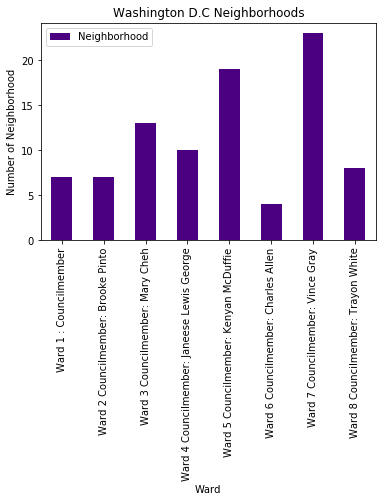

In [10]:

plt.title('Washington D.C Neighborhoods')

plt.xlabel('Wards')

plt.ylabel('Number of Neighborhood')
#
WashingtonDC.groupby('Ward')['Neighborhood'].count().plot(kind='bar',color = "indigo")
plt.legend()
#displays the plot
plt.show()

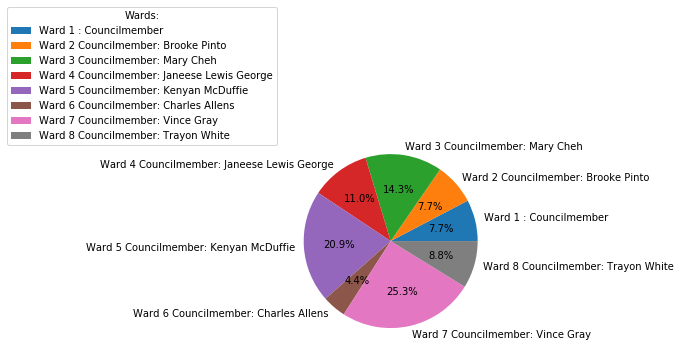

In [11]:
#WashingtonDC.groupby('Ward')['Neighborhood'].count().plot(kind='bar',color = "indigo")
neighborhood = WashingtonDC.groupby('Ward')['Neighborhood'].count()

neighborhood = list(neighborhood)

mylabels = ["Ward 1 : Councilmember", "Ward 2 Councilmember: Brooke Pinto", "Ward 3 Councilmember: Mary Cheh", "Ward 4 Councilmember: Janeese Lewis George","Ward 5 Councilmember: Kenyan McDuffie", "Ward 6 Councilmember: Charles Allens", "Ward 7 Councilmember: Vince Gray", "Ward 8 Councilmember: Trayon White"]

plt.pie(neighborhood, labels = mylabels,autopct='%1.1f%%',textprops={'fontsize': 10})
plt.legend(title = "Wards:",bbox_to_anchor=(0.00, 1.6))
plt.show()


<p>And this is a pie chart to show the information</p>

<p>So from these charts , we know that Ward 7 Councilmember: Vince Gray contains the most amount of Neighborhoods</p>
<p>And Ward 6 Councilmember: Charles Allen contains the least amount of Neighborhoods</p>

<h3>FourSquare API Functions</h3>

In [12]:
#function to extract data from foursquare API
def venue_data(lat,lng):

    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            2000, 
            LIMIT)
    
    res = requests.get(url).json()
    venueData=results["response"]['groups'][0]['items']
    venueDetails=[]
    for row in neighborhoods_data:
        try:
            venueId=row['venue']['id']
            venueName=row['venue']['name']
            venueneCategory=row['venue']['categories'][0]['name']
            venueDetails.append([venueId,venueName,venueCategory])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venueDetails,columns=column_names)
    return df

In [13]:
#Function to get more details from foursquare API

def venue_details(venueId):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            neighborhoods_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venueData=results['response']['venue']
    venueDetails=[]
    try:
        venueId=neighborhoods_data['id']
        venueName=neighborhoods_data['name']
        venueRating=neighborhoods_data['rating']
        venueDetails.append([venueId,venueName,venueRating])
    except KeyError:
        pass
        
    venue_details=['ID','Name','Rating']
    df = pd.DataFrame(neighborhoods_details,columns=column_names)
    return df

<h3>Map</h3>

In [14]:
#Location function

def location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    lat = location.latitude
    long = location.longitude
    return lat,long

In [15]:
ny_map = folium.Map(location=location('Washington,DC'), zoom_start=12)

In [19]:

incidents = folium.map.FeatureGroup()

for lat, lng, in zip(washingtonDC_data()['Latitude'],washingtonDC_data()['Longitude']):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=15, 
            color='blue',
            fill=True,
            fill_color='black',
            fill_opacity=0.7
        )
    )

## Conclusion <a name="conclusion"></a>

<hp>Data about different neighborhoods have been explored</hp>